In [184]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [3]:
pd.read_csv('Data/games.csv')

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2020-12-19,12000047,Final,1610612753,1610612766,2020,1610612753,120.0,0.433,0.792,...,23.0,50.0,1610612766,117.0,0.444,0.864,0.439,21.0,52.0,1
1,2020-12-19,12000048,Final,1610612764,1610612765,2020,1610612764,99.0,0.427,0.625,...,24.0,45.0,1610612765,96.0,0.402,0.647,0.326,18.0,51.0,1
2,2020-12-19,12000049,Final,1610612763,1610612737,2020,1610612763,116.0,0.400,0.744,...,21.0,43.0,1610612737,117.0,0.422,0.837,0.297,24.0,47.0,0
3,2020-12-18,12000039,Final,1610612754,1610612755,2020,1610612754,107.0,0.371,0.692,...,19.0,45.0,1610612755,113.0,0.533,0.629,0.355,23.0,48.0,0
4,2020-12-18,12000040,Final,1610612761,1610612748,2020,1610612761,105.0,0.380,0.737,...,27.0,37.0,1610612748,117.0,0.534,0.741,0.514,30.0,51.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23515,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
23516,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
23517,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
23518,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


In [4]:
##2.1 Exploration des données
GAME_COLS  =['GAME_ID','PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away',	'AST_away',	'REB_away','HOME_TEAM_WINS']
data = pd.read_csv('Data/games.csv', usecols = GAME_COLS)
data

,GAME_ID,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,12000047,120.0,0.433,0.792,0.425,23.0,50.0,0.444,0.864,0.439,21.0,52.0,1
1,12000048,99.0,0.427,0.625,0.295,24.0,45.0,0.402,0.647,0.326,18.0,51.0,1
2,12000049,116.0,0.400,0.744,0.396,21.0,43.0,0.422,0.837,0.297,24.0,47.0,0
3,12000039,107.0,0.371,0.692,0.262,19.0,45.0,0.533,0.629,0.355,23.0,48.0,0
4,12000040,105.0,0.380,0.737,0.356,27.0,37.0,0.534,0.741,0.514,30.0,51.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23515,11400007,93.0,0.419,0.821,0.421,24.0,50.0,0.366,0.643,0.375,17.0,43.0,1
23516,11400004,81.0,0.338,0.719,0.381,18.0,40.0,0.411,0.636,0.267,17.0,47.0,0
23517,11400005,98.0,0.448,0.682,0.500,29.0,45.0,0.387,0.659,0.500,19.0,43.0,1
23518,11400002,99.0,0.440,0.771,0.333,21.0,30.0,0.469,0.725,0.385,18.0,45.0,1


In [5]:
## Calcul des tableaux
homeWin = data.loc[:,"HOME_TEAM_WINS"]*100
reboundHWin = []
reboundAWin = []
reboundHLoose = []
reboundALoose = []
assistHWin = []
assistAWin = []
assistHLoose = []
assistALoose = []
ptsHWin = []
ptsHLoose = []
i = 0
for x in homeWin:
    if x == 100:
        reboundHWin.append(data.loc[i,"REB_home"])
        reboundAWin.append(data.loc[i,"REB_away"])
        assistHWin.append(data.loc[i,"AST_home"])
        assistALoose.append(data.loc[i,"AST_away"])
        ptsHWin.append(data.loc[i,"PTS_home"])
    else:
        reboundHLoose.append(data.loc[i,"REB_home"])
        reboundALoose.append(data.loc[i,"REB_away"])
        assistHLoose.append(data.loc[i,"AST_home"])
        assistAWin.append(data.loc[i,"AST_away"])
        ptsHLoose.append(data.loc[i,"PTS_home"])
    i = i + 1

C:\Users\neyra\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\neyra\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


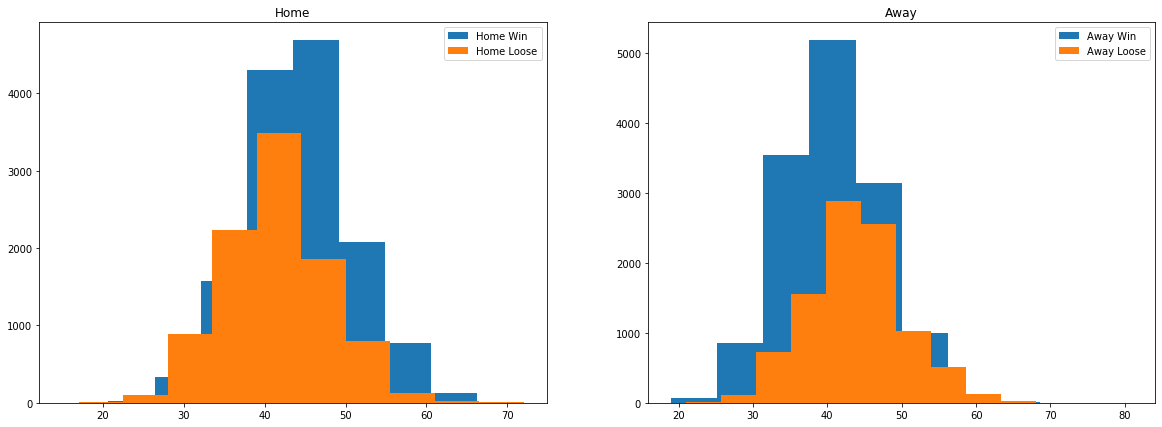

In [6]:
fig = plt.figure(1, figsize=(20,7))
plt.xlabel('Nombre de rebonds')
plt.ylabel('Nombre de matchs')

#home
plt.subplot(1,2,1)
plt.hist(reboundHWin, label='Home Win')
plt.hist(reboundHLoose, label= 'Home Loose')
plt.title("Home")
plt.legend()
#On remarque que quand home fait des rebonds elle gagne plus souvent et plus le nombre de rebond est élevé plus elle gagne

#away
plt.subplot(1,2,2)
plt.hist(reboundAWin, label='Away Win')
plt.hist(reboundALoose, label= 'Away Loose')
plt.title("Away")
plt.legend()
#Par contre pour away l'equipe gagne plus quand le nombre de rebond est moins élevé.

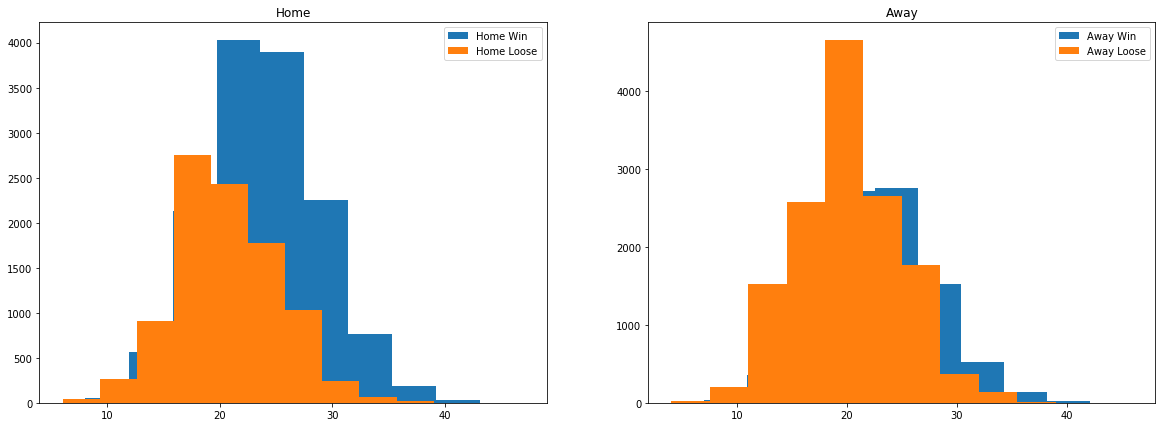

In [7]:
fig = plt.figure(1, figsize=(20,7))
plt.xlabel('Nombre de passes décisives')
plt.ylabel('Nombre de matchs')

#home
plt.subplot(1,2,1)
plt.hist(assistHWin, label='Home Win')
plt.hist(assistHLoose, label= 'Home Loose')
plt.title("Home")
plt.legend()
#On remarque quand home gagne les matchs, elle a fait plus de passes décisives

#away
plt.subplot(1,2,2)
plt.hist(assistAWin, label='Away Win')
plt.hist(assistALoose, label= 'Away Loose')
plt.title("Away")
plt.legend()
#Quand away loose son nombre moyen de passes décisives par match est plus bas

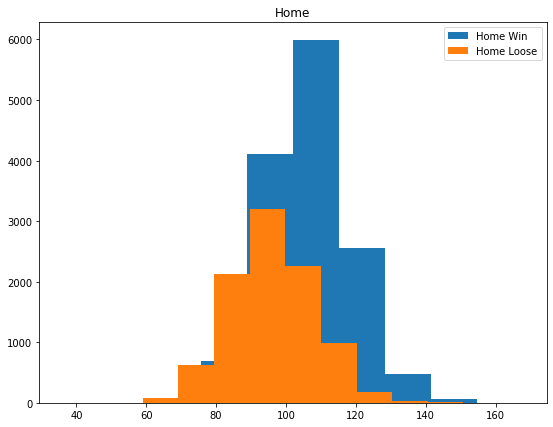

In [8]:
fig = plt.figure(1, figsize=(20,7))
plt.xlabel('Nombre de points')
plt.ylabel('Nombre de matchs')

plt.subplot(1,2,1)
plt.hist(ptsHWin, label='Home Win')
plt.hist(ptsHLoose, label= 'Home Loose')
plt.title("Home")
plt.legend()
#Est-ce que à partir d'un certains nombres de point marqués à domicile on peut ou pas définir qui va gagner ?


In [191]:
#2.3 Pre-processing
#attribution des données pour X et y
#'PTS_home', 
X_ARG  =['FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away','AST_away',	'REB_away']
y_ARG =['HOME_TEAM_WINS']
X = pd.read_csv('Data/games.csv', usecols = X_ARG)
y = pd.read_csv('Data/games.csv', usecols = y_ARG)

#Normalisation "min-max"
def minmax_norm(Data_input):
    return (Data_input - Data_input.min()) / ( Data_input.max() - Data_input.min())

#Normalisation "moyenne"
def mean_norm(Data_input):
    return Data_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

#Valeurs plus exploitables avec la methode min-max
X_normalized = minmax_norm(X)
# X_normalized = mean_norm(X)
X_normalized, X

(       FG_PCT_home  FT_PCT_home  FG3_PCT_home  AST_home  REB_home  \
 0         0.421659     0.757293         0.425  0.414634  0.614035   
 1         0.407834     0.562427         0.295  0.439024  0.526316   
 2         0.345622     0.701284         0.396  0.365854  0.491228   
 3         0.278802     0.640607         0.262  0.317073  0.526316   
 4         0.299539     0.693116         0.356  0.512195  0.385965   
 ...            ...          ...           ...       ...       ...   
 23515     0.389401     0.791132         0.421  0.439024  0.614035   
 23516     0.202765     0.672112         0.381  0.292683  0.438596   
 23517     0.456221     0.628938         0.500  0.560976  0.526316   
 23518     0.437788     0.732789         0.333  0.365854  0.263158   
 23519     0.417051     0.625438         0.333  0.292683  0.473684   
 
        FG_PCT_away  FT_PCT_away  FG3_PCT_away  AST_away  REB_away  
 0         0.465116     0.841307         0.439  0.404762  0.532258  
 1         0.367442 

In [192]:
#On donne la bonne shape a y pour la cross validation et le fit
newY = np.zeros(23520)
for i in range(0,23520):
    newY[i] = y.iat[i, 0]
y.shape, newY.shape

# Faire la moyenne des valeurs de chaque colonne.
Xmoy = X_normalized.mean()
# On fill les valeurs : NaN.
X_normalized = X_normalized.fillna(value=Xmoy)

# On verifie que toutes les valeurs du data set sont propre. 
# Résultat attendu (True, False)
np.all(np.isfinite(X_normalized)), np.any(X_normalized.isna())

(True, False)

In [193]:
#2.4 Optimisation
#En premier, on utilise la cross validation et on definit la valeur des hyper-parametres (c) du modele
lScore = []
for c in range(1,4):
    clf1 = svm.SVC(C = c,kernel = 'linear')
    scores = cross_val_score(clf1, X_normalized, newY, cv=4)
    print('On obtient les scores suivant avec C= ' + str(c) + ' : ' + str(scores))
    lScore.append(np.average(scores))
    
print('On obtient le score moy suivant pour chaque c : ' + str(lScore))
#score satisfaisant mais pas très haut

On obtient les scores suivant avec C= 1 : [0.84591837 0.84319728 0.81309524 0.84404762]
On obtient les scores suivant avec C= 2 : [0.84591837 0.84251701 0.81326531 0.84404762]
On obtient les scores suivant avec C= 3 : [0.84591837 0.84268707 0.81343537 0.84353741]
On obtient le score moy suivant pour chaque c : [0.8365646258503401, 0.836437074829932, 0.8363945578231293]


In [194]:
#En deuxième, on utilise la fonction fit, on regarde la différence avec la cross validation
#générer un entrainement set adéquat.
#générer un validation set adéquat
#Fonction de sklearn
X_train, X_val, y_train, y_val = train_test_split(X_normalized, newY, test_size=0.3, random_state=0)
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((16464, 10), (16464,), (7056, 10), (7056,))

In [195]:
#entrainer le modele avec un fit
tScore = []
vScore = []
for c in range(1,5):
    clf2 = svm.SVC(C = c,kernel = 'linear')
    clf2.fit(X_train,y_train)
    print("training score avec c=",str(c)," ",clf2.score(X_train,y_train))
    print("validation score avec c=",str(c)," ",clf2.score(X_val,y_val))
    tScore.append(clf2.score(X_train,y_train))
    vScore.append(clf2.score(X_val,y_val))
print('On obtient le score training moy suivant : ' + str(np.average(tScore)))
print('On obtient le score validation moy suivant : ' + str(np.average(vScore)))


training score avec c= 1   0.8332725947521866
validation score avec c= 1   0.8463718820861678
training score avec c= 2   0.8332118561710399
validation score avec c= 2   0.846655328798186
training score avec c= 3   0.8335155490767736
validation score avec c= 3   0.846655328798186
training score avec c= 4   0.8333940719144801
validation score avec c= 4   0.846655328798186
On obtient le score training moy suivant : 0.83334851797862
On obtient le score validation moy suivant : 0.8465844671201814


In [196]:
#2.4.2 Pre-processing 2
#attribution des données pour X et y
X_ARG  =['PTS_home','FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home']
y_ARG =['HOME_TEAM_WINS']
X = pd.read_csv('Data/games.csv', usecols = X_ARG)
y = pd.read_csv('Data/games.csv', usecols = y_ARG)
X_normalized = minmax_norm(X)
newY = np.zeros(23520)
for i in range(0,23520):
    newY[i] = y.iat[i, 0]
y.shape, newY.shape
Xmoy = X_normalized.mean()
X_normalized = X_normalized.fillna(value=Xmoy)
X_train, X_val, y_train, y_val = train_test_split(X_normalized, newY, test_size=0.3, random_state=0)

In [189]:
#entrainer le modele avec un fit
tScore = []
vScore = []
for c in range(1,5):
    clf3 = svm.SVC(C = c,kernel = 'linear')
    clf3.fit(X_train,y_train)
    print("training score avec c=",str(c)," ",clf3.score(X_train,y_train))
    print("validation score avec c=",str(c)," ",clf3.score(X_val,y_val))
    tScore.append(clf3.score(X_train,y_train))
    vScore.append(clf3.score(X_val,y_val))
print('On obtient le score training moy suivant : ' + str(np.average(tScore)))
print('On obtient le score validation moy suivant : ' + str(np.average(vScore)))

training score avec c= 1   0.7634839650145773
validation score avec c= 1   0.7658730158730159
training score avec c= 2   0.7626336248785228
validation score avec c= 2   0.7664399092970522
training score avec c= 3   0.7626943634596696
validation score avec c= 3   0.7658730158730159
training score avec c= 4   0.7625728862973761
validation score avec c= 4   0.766156462585034
On obtient le score training moy suivant : 0.7628462099125364
On obtient le score validation moy suivant : 0.7660856009070295


In [190]:
lScore = []
for c in range(1,4):
    clf1 = svm.SVC(C = c,kernel = 'linear')
    scores = cross_val_score(clf1, X_normalized, newY, cv=4)
    print('On obtient les scores suivant avec C= ' + str(c) + ' : ' + str(scores))
    lScore.append(np.average(scores))
    
print('On obtient le score moy suivant pour chaque c : ' + str(lScore))

On obtient les scores suivant avec C= 1 : [0.77278912 0.77397959 0.7297619  0.77380952]
On obtient les scores suivant avec C= 2 : [0.77363946 0.77397959 0.73027211 0.77329932]
On obtient les scores suivant avec C= 3 : [0.77329932 0.77414966 0.73027211 0.77380952]
On obtient le score moy suivant pour chaque c : [0.7625850340136054, 0.762797619047619, 0.7628826530612245]
